In [1]:
import pandas as pd
import copy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("data/Housing.csv")

In [2]:
rows, cols = df.shape
print(f"Rows: {rows}\nColumns: {cols}")
print(f"Variables (Columns): {df.columns}")
df

Rows: 545
Columns: 13
Variables (Columns): Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Basic Graph

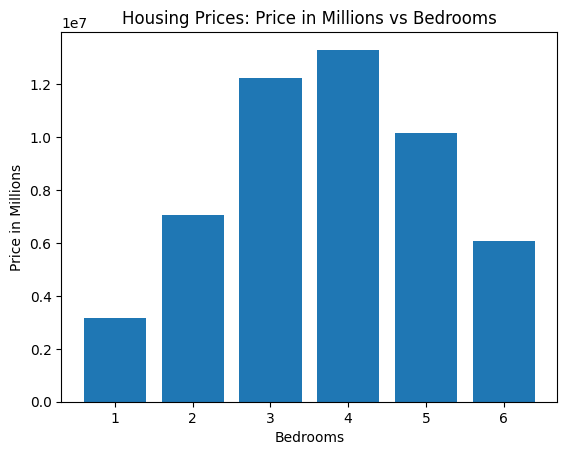

In [7]:
plt.bar(df['bedrooms'], df['price'])
plt.xlabel("Bedrooms")
plt.ylabel("Price in Millions")
plt.title("Housing Prices: Price in Millions vs Bedrooms")
plt.show()

<Axes: >

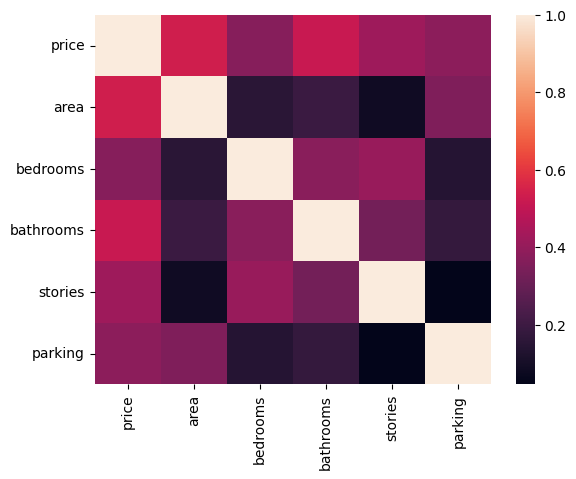

In [10]:
import seaborn as sns

corr = df.select_dtypes('number').corr()

sns.heatmap(corr)




In [11]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,price,area,bedrooms,bathrooms,stories,parking
price,1.000,0.536,0.366,0.518,0.421,0.384
area,0.536,1.000,0.152,0.194,0.084,0.353
bedrooms,0.366,0.152,1.000,0.374,0.409,0.139
bathrooms,0.518,0.194,0.374,1.000,0.326,0.177
stories,0.421,0.084,0.409,0.326,1.000,0.046
parking,0.384,0.353,0.139,0.177,0.046,1.000


<Axes: >

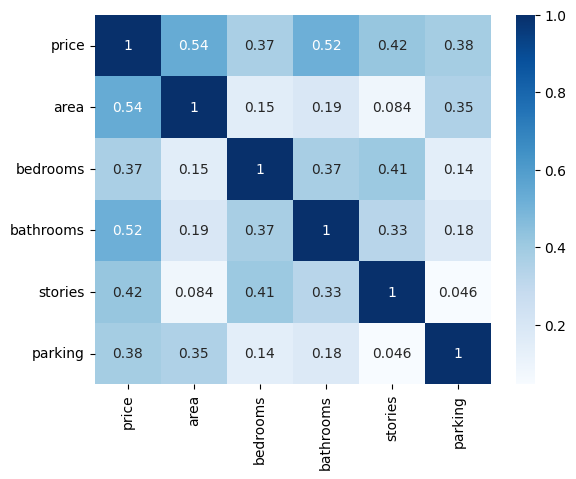

In [17]:
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: xlabel='area', ylabel='price'>

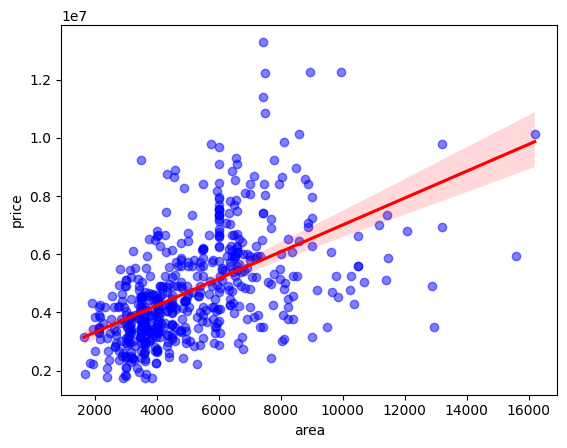

In [29]:
#sns.scatterplot(data=df, x="area", y="price")
sns.regplot(data=df, x="area", y="price", scatter_kws={"alpha": 0.5, "color": "blue"}, color="red")

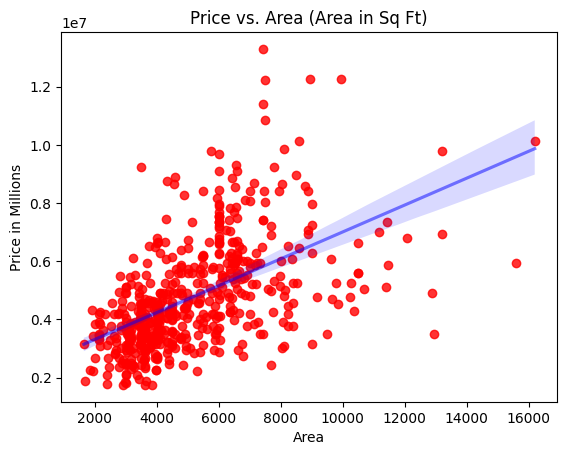

In [60]:
sns.regplot(data=df, x="area", y="price", line_kws={"alpha": 0.5, "color": "blue"}, color="red")
plt.xlabel("Area")
plt.ylabel("Price in Millions")
plt.title("Price vs. Area (Area in Sq Ft)")
plt.show()

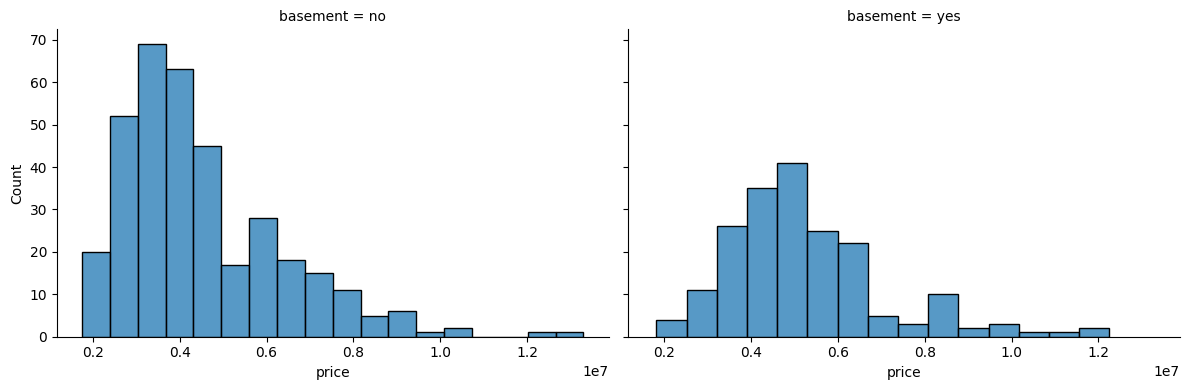

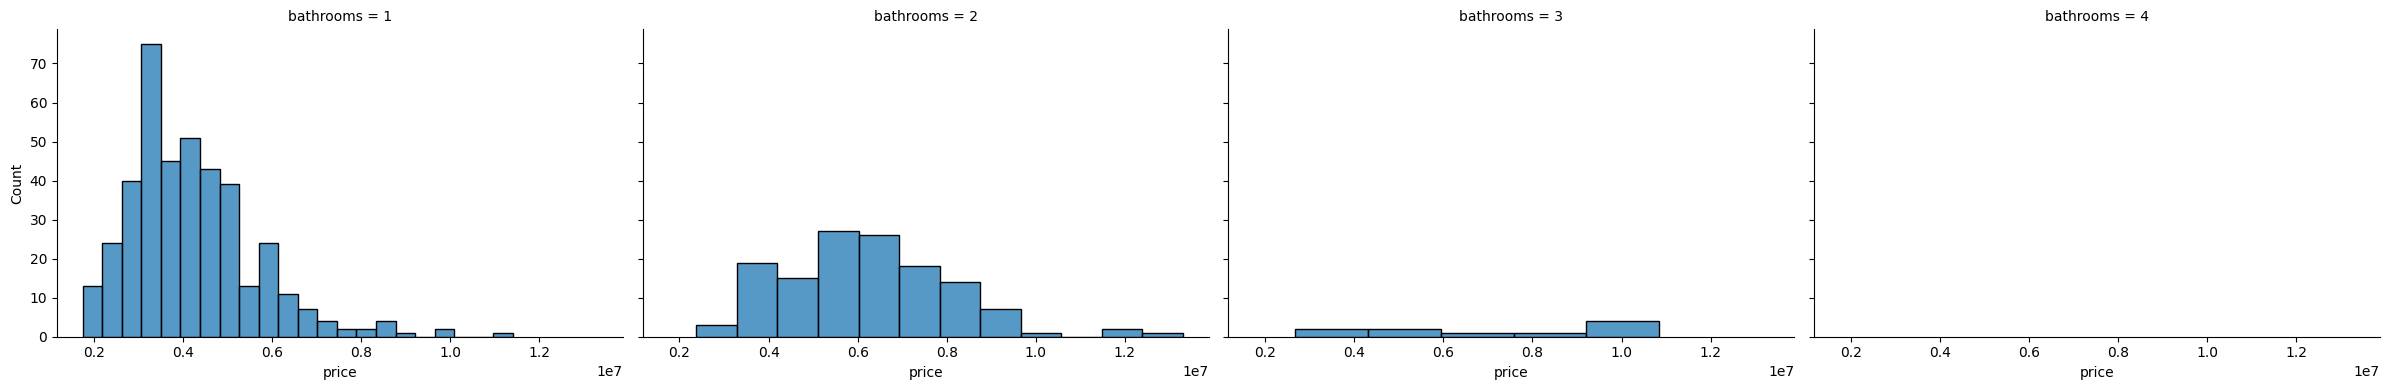

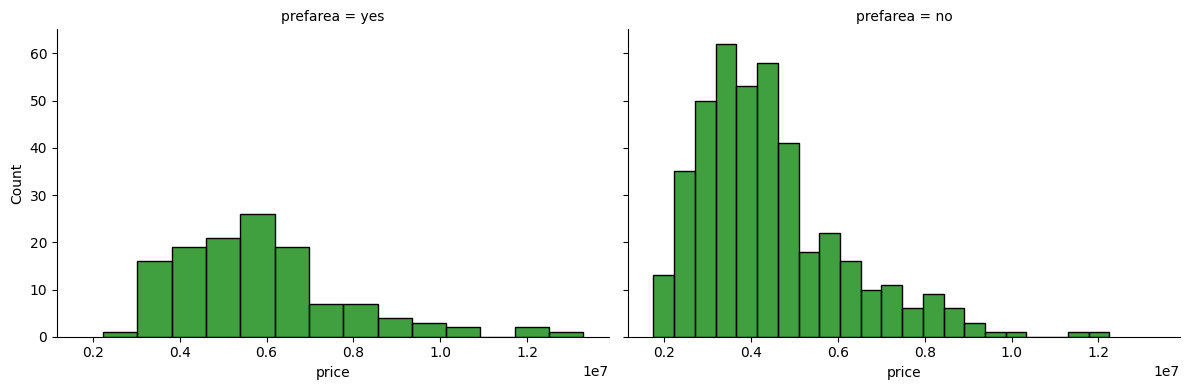

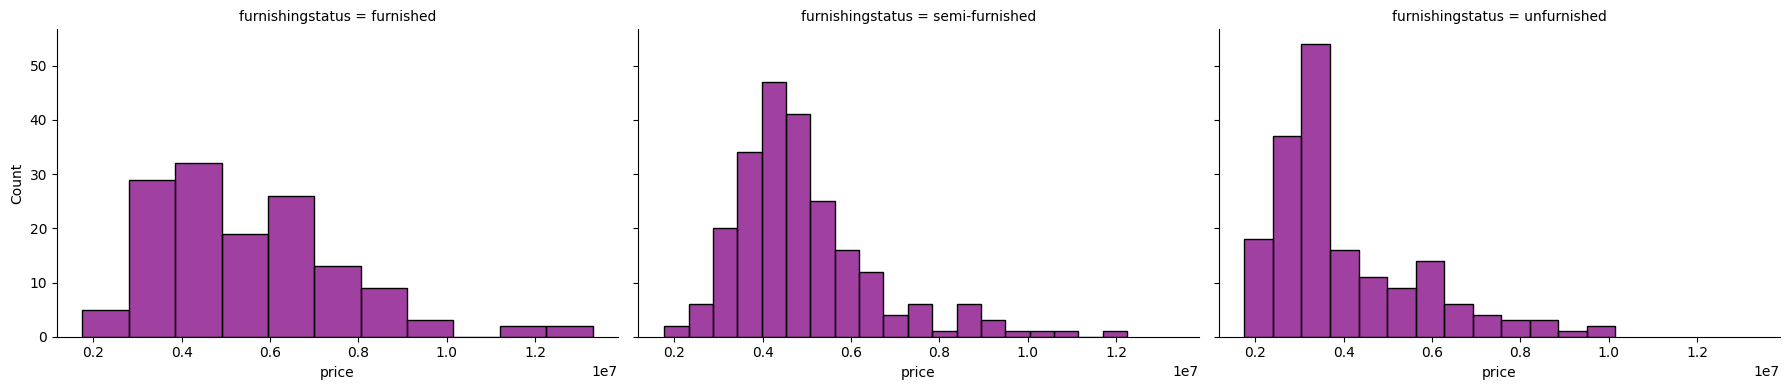

In [61]:
def flexible_facetgrid(data, facet_by=None, hue_by=None, height=4, aspects=1.5, **kwargs):
    g = sns.FacetGrid(
        data=data,
        col=facet_by,
        hue=hue_by,
        height=height,
        aspect=aspects,
        **kwargs,
    )
    return g
# Histogram of Basement
g = flexible_facetgrid(df, "basement")
g.map(sns.histplot, "price")
# Histogram of Bathrooms
bedroom_hist = flexible_facetgrid(df, "bathrooms")
bedroom_hist.map(sns.histplot, "price")
# Histogram of prefarea
prefarea_hist = flexible_facetgrid(df, "prefarea")
prefarea_hist.map(sns.histplot, "price", color="green")
# Histogram of Furnished
furnished_hist = flexible_facetgrid(df, "furnishingstatus")
furnished_hist.map(sns.histplot, "price", color="purple")
plt.show()